# Import Necessary Libraries for EDA

In [3]:
# 📘 01_eda.ipynb
# Exploratory Data Analysis on Brent Oil Prices
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set_style("darkgrid")
sns.set_context("notebook")


# Load Brent oil prices Data 

In [4]:
# 2. Load Brent Oil Price Data (auto parse mixed formats)
df = pd.read_csv('../data/raw/BrentOilPrices.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)
df = df.sort_index()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(inplace=True)
print("✅ Data Loaded Succesfully")

C:\Users\dell\AppData\Local\Temp\ipykernel_13812\1444907803.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


✅ Data Loaded Succesfully


## check Missing value

In [5]:
# Check for Missing value
df.isnull().sum()


Price    0
dtype: int64

# Plot the Time series without Events

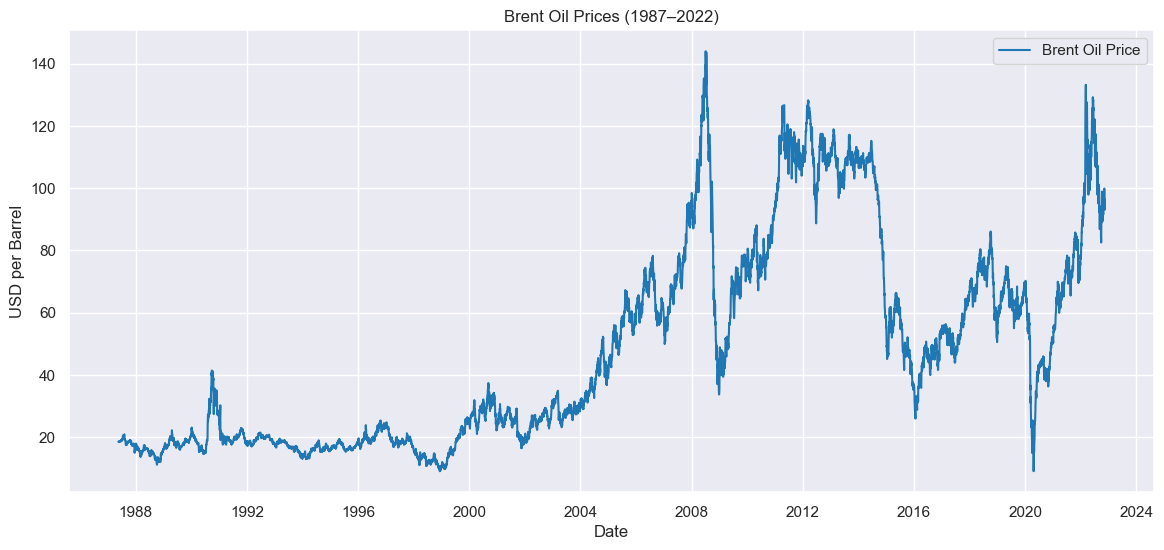

In [6]:
# 3. Plot Time Series
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices (1987–2022)')
plt.ylabel('USD per Barrel')
plt.xlabel('Date')
plt.legend()
plt.show()

# ADF test for Stationarity check

In [7]:
# 4. ADF Test (Stationarity Check)
adf_result = adfuller(df['Price'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("⚠️ The series is non-stationary (we'll use log returns).")


ADF Statistic: -1.993856011392467
p-value: 0.2892735048934032
⚠️ The series is non-stationary (we'll use log returns).


# We use Log returns

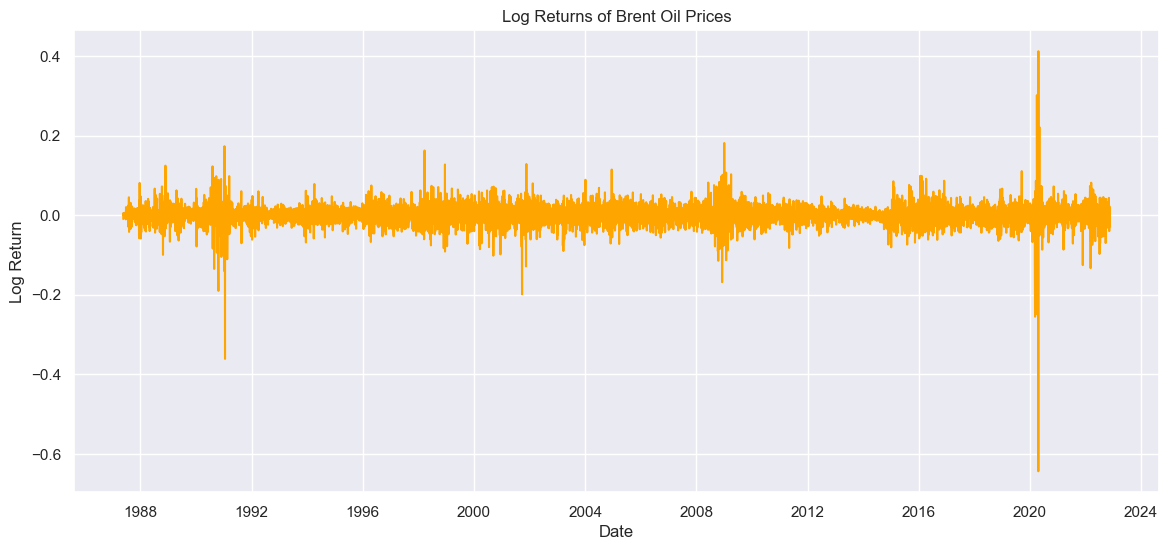

In [8]:
# 5. Calculate Log Returns
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))
df.dropna(inplace=True)

# Plot Log Returns
plt.figure(figsize=(14, 6))
plt.plot(df['Log_Return'], color='orange')
plt.title('Log Returns of Brent Oil Prices')
plt.ylabel('Log Return')
plt.xlabel('Date')
plt.show()


# Load Event Data

In [9]:
# 6. Load Event Data
events = pd.read_csv('../data/raw/events.csv')
events['Event_date'] = pd.to_datetime(events['Event_date'])
print("✅ Data Loaded Successfully")

✅ Data Loaded Successfully


# Plot Time series with Events overlay

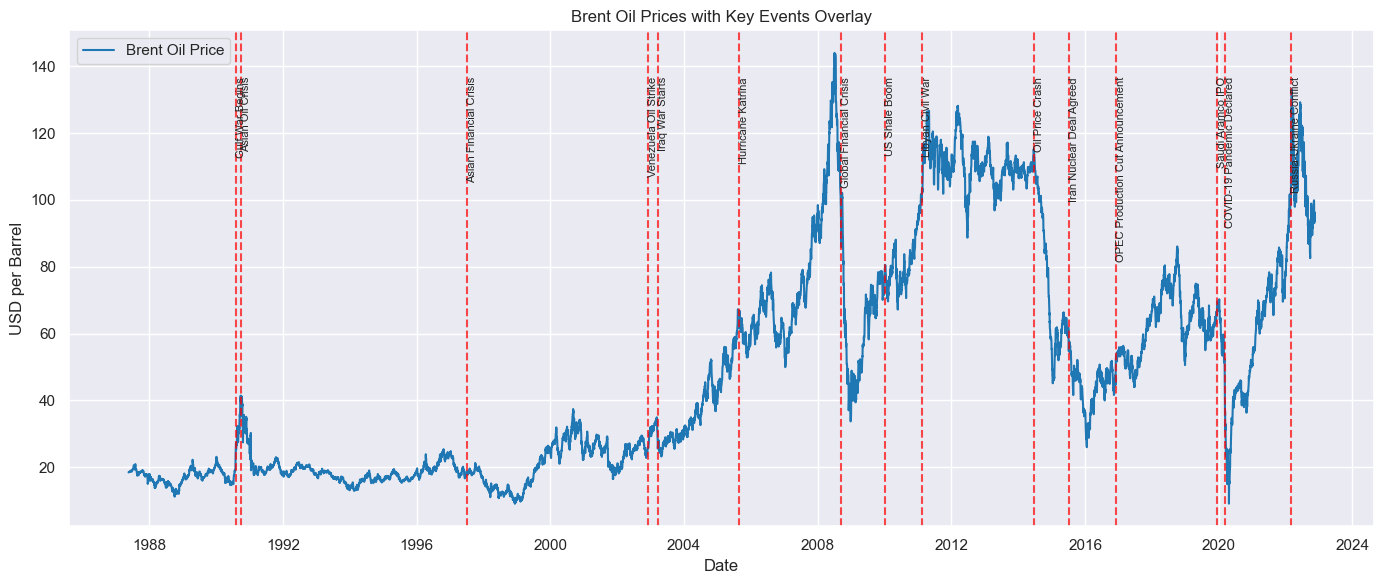

In [10]:
# 7. Overlay Events on Time Series
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Brent Oil Price')
for _, row in events.iterrows():
    plt.axvline(row['Event_date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Event_date'], df['Price'].max()*0.95, row['Event_name'],
             rotation=90, fontsize=8, verticalalignment='top')

plt.title('Brent Oil Prices with Key Events Overlay')
plt.ylabel('USD per Barrel')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

# Save cleaned data.

In [11]:
# 8. Save Cleaned Data
df.to_csv('../data/processed/brent_prices_cleaned.csv')
print("✅ Data saved on 'data/processed' folder")

✅ Data saved on 'data/processed' folder
